In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

In [2]:
import warnings
warnings.filterwarnings("ignore")

## <font color ="black">Studying the most relevant risk factors for heart disease Data Set</font>

Index:
1. [**Intro**](#presentation)<br>
2. [**Descriptive Analysis of the Database**](#EDA)<br>
3. [**Pre-processing of the database**](#Pre)<br>
4. [**Supervised or Unsupervised Learning**](#Modelling)<br>
5. [**Feature Selection and Extraction**](#Feature)<br>
6. [**Final Model Selection**](#final)<br>
6. [**Conclusion**](#Conclusionf)<br>
    
<a id='presentation'></a>
## <span style="color:darkslateblue">1. Intro </span>
<a id='source'></a>
### <span style="color:slateblue">1.1 Source of the dataset </span>
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+disease)


<a id='EDA'></a>
## <span style="color:darkslateblue"> 2. Descriptive Analysis of the Dataset</span>

Once data is acquired, after ensuring its quality is optimal for data analysis, a deep exploration before pre-processing must be performed to better understand the data and be able to perform a proper pre-processing and modelling. This is what is called **Exploratory Data Analysis (EDA)**.

Understanding the dataset implies several issues:
1. Get information about data types, shape of the dataset and descriptive metrics.
2. Extract information about the relevancy of some features over others.
3. Identify outliers, missing values or human error.
4. Understand the relationship, or lack of, between variables.
5. Maximize the insight into the dataset and minimize the potential error that may occur during the next steps in the analysis porocess. 

Hence, the main purpose of EDA is to **explore the structure of the data** and **find patterns in behavior and distribution of the data**.

**Descriptive analysis** is the first approach in EDA to summarize the main characteristics of the dataset. It makes use of descriptive statistics and visual methods to get a deeper insigth into the data. In order to carry out a descriptive analysis, we will follow several steps:

0. [**Load Data**](#load)
1. [**Identification of variables and data types**](#dtypes)
2. [**Descriptive statistics of the dataset**](#descriptive)
3. [**Univariate Analysis: Graphical and Non-Graphical**](#univariate)
4. [**Multivariate Analysis: Graphical**](#multivariate)

<a id='load'></a>
### <span style="color:slateblue"> 2.0 Load Data</span>
To load the dataset we will use Pandas method called ***read_csv*** that read CSV (comma-separated) files and convert it into a DataFrame.

In [3]:
dirname=r'/home/lasito/Documents/heart'
cleveland_filename = os.path.join(dirname, 'clevelandFinal.csv')
hungarian_filename = os.path.join(dirname, 'hungarianFinal.csv')
longBeach_filename = os.path.join(dirname, 'longBeachFinal.csv')
switzerland_filename = os.path.join(dirname, 'switzerlandFinal.csv')

cleveland_data = pd.read_csv(cleveland_filename, sep=',',  error_bad_lines=False, encoding='iso-8859-1')
hungarian_data = pd.read_csv(hungarian_filename, sep=',',  error_bad_lines=False, encoding='iso-8859-1')
longBeach_data = pd.read_csv(longBeach_filename, sep=',',  error_bad_lines=False, encoding='iso-8859-1')
switzerland_data = pd.read_csv(switzerland_filename, sep=',',  error_bad_lines=False, encoding='iso-8859-1')

<a id='dtypes'></a>
### <span style="color:slateblue"> 2.1 Identification of variables and data types</span>

In order to get a summary of the dataset, we will use the method ***info***, which shows information such as number of observations, column names, variable type, and number of null entries, among others. 

In [4]:
cleveland_data.nunique()

id          282
ccf           1
age          41
sex           2
cp            4
trestbps     48
htn           2
chol        145
cigs         24
years        40
fbs           2
dm            2
famhist       2
restecg       3
ekgmo        12
ekgday       31
ekgyr         4
dig           2
prop          3
nitr          2
pro           3
diuretic      2
proto         1
thaldur      65
thaltime     48
met          17
thalach      90
thalrest     60
tpeakbps     58
tpeakbpd     40
dummy        48
trestbpd     29
exang         2
xhypo         2
oldpeak      39
slope         3
rldv5e      114
ca            5
thal          4
cmo          12
cday         31
cyr           4
num           5
lmt           2
ladprox       2
laddist       2
cxmain        2
om1           2
rcaprox       2
rcadist       2
lvx1          1
lvx2          1
lvx3          7
lvx4          7
lvf           4
dtype: int64

In [5]:
cleveland_data= cleveland_data.drop(columns=['ccf', 'proto', 'lvx1','lvx2'])

In [6]:
cleveland_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 51 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        282 non-null    int64  
 1   age       282 non-null    int64  
 2   sex       282 non-null    int64  
 3   cp        282 non-null    int64  
 4   trestbps  282 non-null    int64  
 5   htn       282 non-null    int64  
 6   chol      282 non-null    int64  
 7   cigs      282 non-null    float64
 8   years     282 non-null    float64
 9   fbs       282 non-null    int64  
 10  dm        282 non-null    float64
 11  famhist   282 non-null    int64  
 12  restecg   282 non-null    int64  
 13  ekgmo     282 non-null    int64  
 14  ekgday    282 non-null    int64  
 15  ekgyr     282 non-null    int64  
 16  dig       282 non-null    float64
 17  prop      282 non-null    float64
 18  nitr      282 non-null    float64
 19  pro       282 non-null    float64
 20  diuretic  282 non-null    float6

<a id='descriptive'></a>
### <span style="color:slateblue"> 2.2 Descriptive statistics of the dataset</span>

In order to summarize the main and most basic statistical characteristics of the dataset, we will use the method ***describe***.

In [7]:
cleveland_data.describe()

,id,age,sex,cp,trestbps,htn,chol,cigs,years,fbs,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,...,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.00000
mean,151.517730,54.411348,0.677305,3.163121,131.563830,0.617021,249.092199,16.939716,15.250000,0.148936,...,1.042553,1.141844,1.205674,1.156028,1.163121,1.173759,1.127660,1.134752,1.411348,1.14539
std,87.131234,9.053083,0.468338,0.955405,17.757496,0.486977,51.217546,19.489068,15.353848,0.356658,...,0.202206,0.349510,0.404912,0.363527,0.370132,0.379576,0.334304,0.766002,1.439508,0.44257
min,1.000000,29.000000,0.000000,1.000000,94.000000,0.000000,126.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,75.250000,48.000000,0.000000,3.000000,120.000000,0.000000,213.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
50%,151.500000,55.000000,1.000000,3.000000,130.000000,1.000000,244.000000,10.000000,15.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
75%,227.750000,61.000000,1.000000,4.000000,140.000000,1.000000,277.000000,30.000000,30.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,298.000000,77.000000,1.000000,4.000000,200.000000,1.000000,564.000000,99.000000,54.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,8.000000,4.00000


The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

In [8]:
cleveland_data.loc[cleveland_data['num'] > 0, 'num'] = 1

In [9]:
#Function to plot percentages on sns.countplot bars
#https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

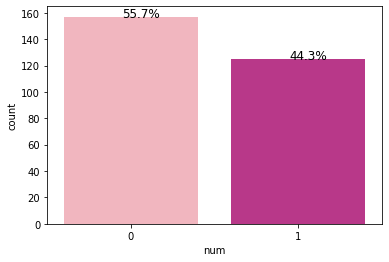

In [10]:
ax = sns.countplot(cleveland_data['num'],label="count", palette="RdPu")

without_hue(ax, cleveland_data['num'])

<a id="univariate"></a>
### <span style="color:slateblue"> 2.3 Univariate Analysis: Graphical</span>

#### <span style="color:#DB8AC4">M/B Frequency Distribution</span>

We will first analyze how feature values are distributed when comparing benign and malignant cases. The way we will do it is by plotting the **frequency distribution** of each variable for each diagnosis by means of **histograms**. 

We will only plot the histograms for the **_mean** variables since these are the most interpretable ones for our purpose, which is to analyze differences in nuclei between malignant and benignant tissues and identify those variables that may be useful for our analysis. 

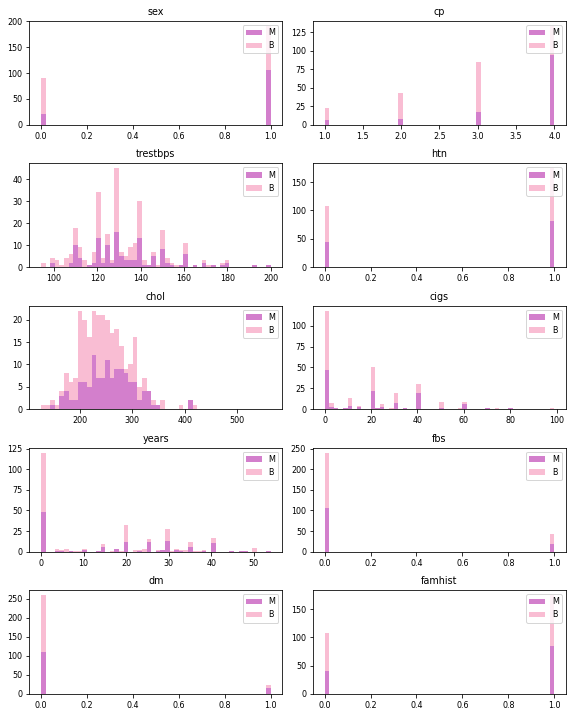

In [11]:
features_mean=list(cleveland_data.columns[2:12])
# split dataframe into two based on num
dfM=cleveland_data[cleveland_data['num'] ==1]
dfB=cleveland_data[cleveland_data['num'] ==0]

#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(cleveland_data[features_mean[idx]]) - min(cleveland_data[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(cleveland_data[features_mean[idx]]), max(cleveland_data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['#A9009A','#F47CA9'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

### <span style="color:slateblue"> 2.4 Multivariate Analysis</span>

#### <span style="color:#DB8AC4">Correlation</span>

Now we are going to analyze the relationships between pairs of variables. Analyzing the correlation between variables can give us information about:
1. **How to handle missing data**: if two variables are highly correlated, they can be used to predict missing values among themselves. 
2. **Collinearity between variables**: linear models rely on the independency of the variables. The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. This way, if there exists a significant relationship between predictors, coefficient estimations and predictions can be less precisse and less reliable. It also causes **overfitting** in linear regression analysis models. In our case, we are dealing with a classification problem and we will mainly use non-parametric models, so we won't be significantly affected by multicollinearity. 
3. **Redundant variables**: features that show a very high correlation may suppose adding redundant data to our analysis, since two predictors may be providing the same information about the response variable. We will further confirm this when variables are scaled.
4. **Find relevant relationships for interpretation of the analysis.**

To show correlation between features we will both display a **correlation matrix**, a **heatmap** (Pearson's Correlation Coefficient) and a **scatter plot**. 

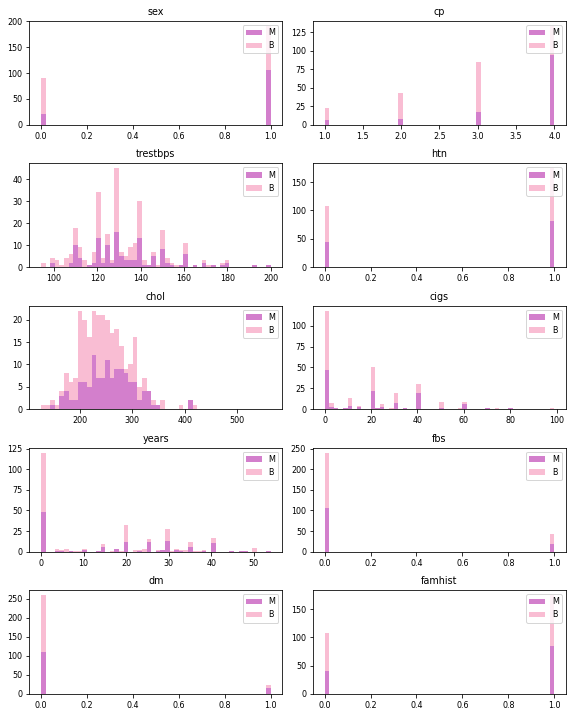

In [12]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(cleveland_data[features_mean[idx]]) - min(cleveland_data[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(cleveland_data[features_mean[idx]]), max(cleveland_data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['#A9009A','#F47CA9'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [13]:
cleveland_data.corr()

,id,age,sex,cp,trestbps,htn,chol,cigs,years,fbs,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
id,1.000000,-0.008107,-0.091995,0.014115,-0.037499,-0.026175,-0.019393,-0.157423,-0.140275,-0.041998,...,-0.033169,-0.186121,0.075347,0.005642,0.104078,-0.037700,0.022646,0.096527,0.013901,-0.003712
age,-0.008107,1.000000,-0.091125,0.077383,0.274466,-0.035174,0.218295,-0.121958,0.059129,0.104400,...,0.126486,0.056849,0.112752,0.157767,0.181691,0.099258,0.194242,0.022769,0.057150,-0.022086
sex,-0.091995,-0.091125,1.000000,0.022619,-0.058920,0.095946,-0.189397,0.329268,0.240645,0.054396,...,0.070360,0.106699,0.182337,0.171370,0.140503,0.096331,0.127673,0.062122,0.107856,0.055465
cp,0.014115,0.077383,0.022619,1.000000,-0.070886,0.020017,0.098889,0.097143,0.079087,-0.071550,...,0.111309,0.292811,0.244135,0.213357,0.226393,0.314090,0.123985,0.125464,0.202032,0.027875
trestbps,-0.037499,0.274466,-0.058920,-0.070886,1.000000,-0.151487,0.157118,-0.035059,0.059582,0.142902,...,0.110244,0.046128,0.045187,0.043106,0.173839,0.046130,0.147892,0.044104,0.017903,0.056097
htn,-0.026175,-0.035174,0.095946,0.020017,-0.151487,1.000000,0.045224,0.056241,0.180626,-0.162173,...,0.021530,-0.035144,-0.014208,0.097518,-0.086536,-0.043011,0.039068,0.014818,0.058003,0.061130
chol,-0.019393,0.218295,-0.189397,0.098889,0.157118,0.045224,1.000000,-0.111587,-0.044494,0.019506,...,-0.004504,0.042009,0.051763,0.125755,0.010467,0.108273,0.076627,0.000589,-0.008480,-0.003733
cigs,-0.157423,-0.121958,0.329268,0.097143,-0.035059,0.056241,-0.111587,1.000000,0.646688,0.046350,...,0.080121,0.073880,-0.032020,0.054576,-0.017625,0.021866,0.007194,-0.039025,-0.000318,0.007621
years,-0.140275,0.059129,0.240645,0.079087,0.059582,0.180626,-0.044494,0.646688,1.000000,-0.017546,...,0.129527,0.042442,0.017745,0.053557,0.014403,0.025188,0.072106,-0.092742,-0.007326,0.057478
fbs,-0.041998,0.104400,0.054396,-0.071550,0.142902,-0.162173,0.019506,0.046350,-0.017546,1.000000,...,-0.038846,0.029763,0.058198,0.012264,0.004015,0.071031,0.078745,0.121668,0.005014,0.087783


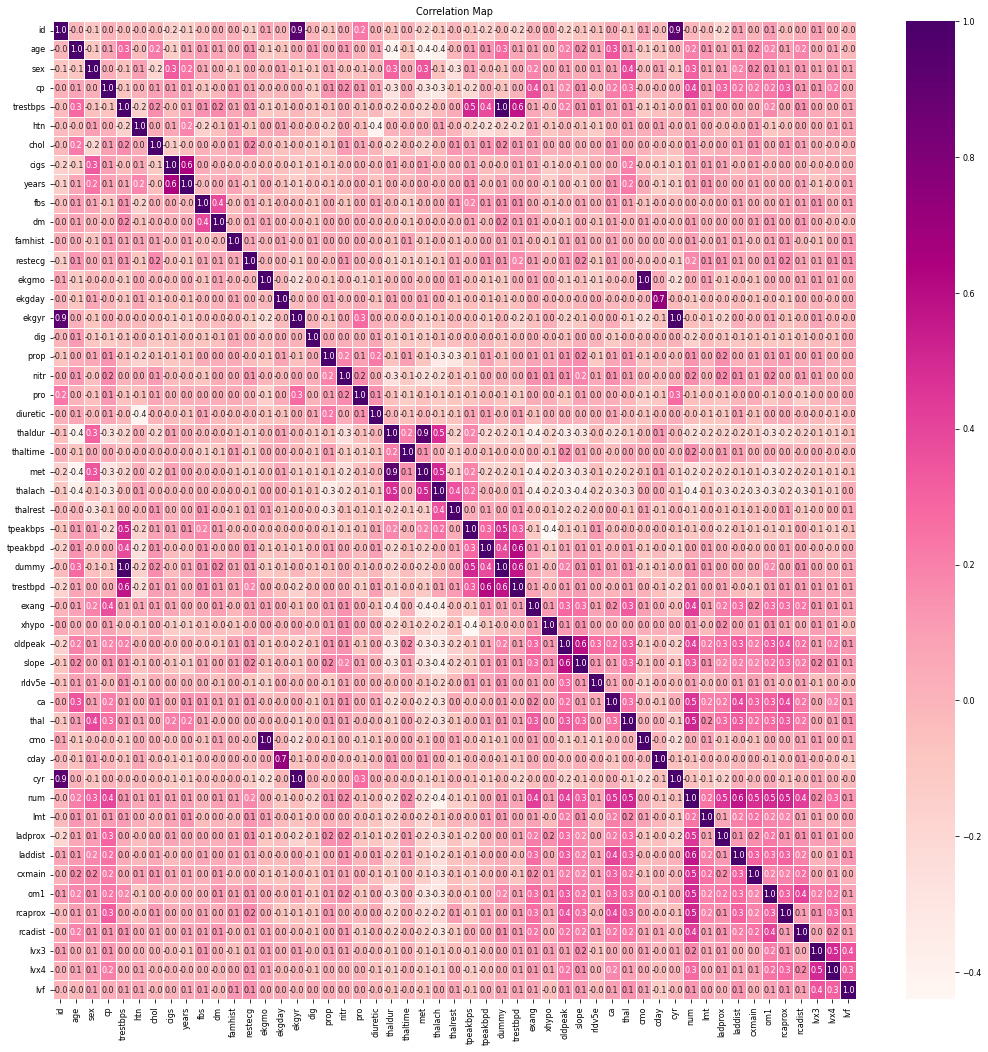

In [14]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(cleveland_data.corr(),annot= True,linewidths=1,fmt = ".1f",ax=ax, cmap='RdPu' )
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

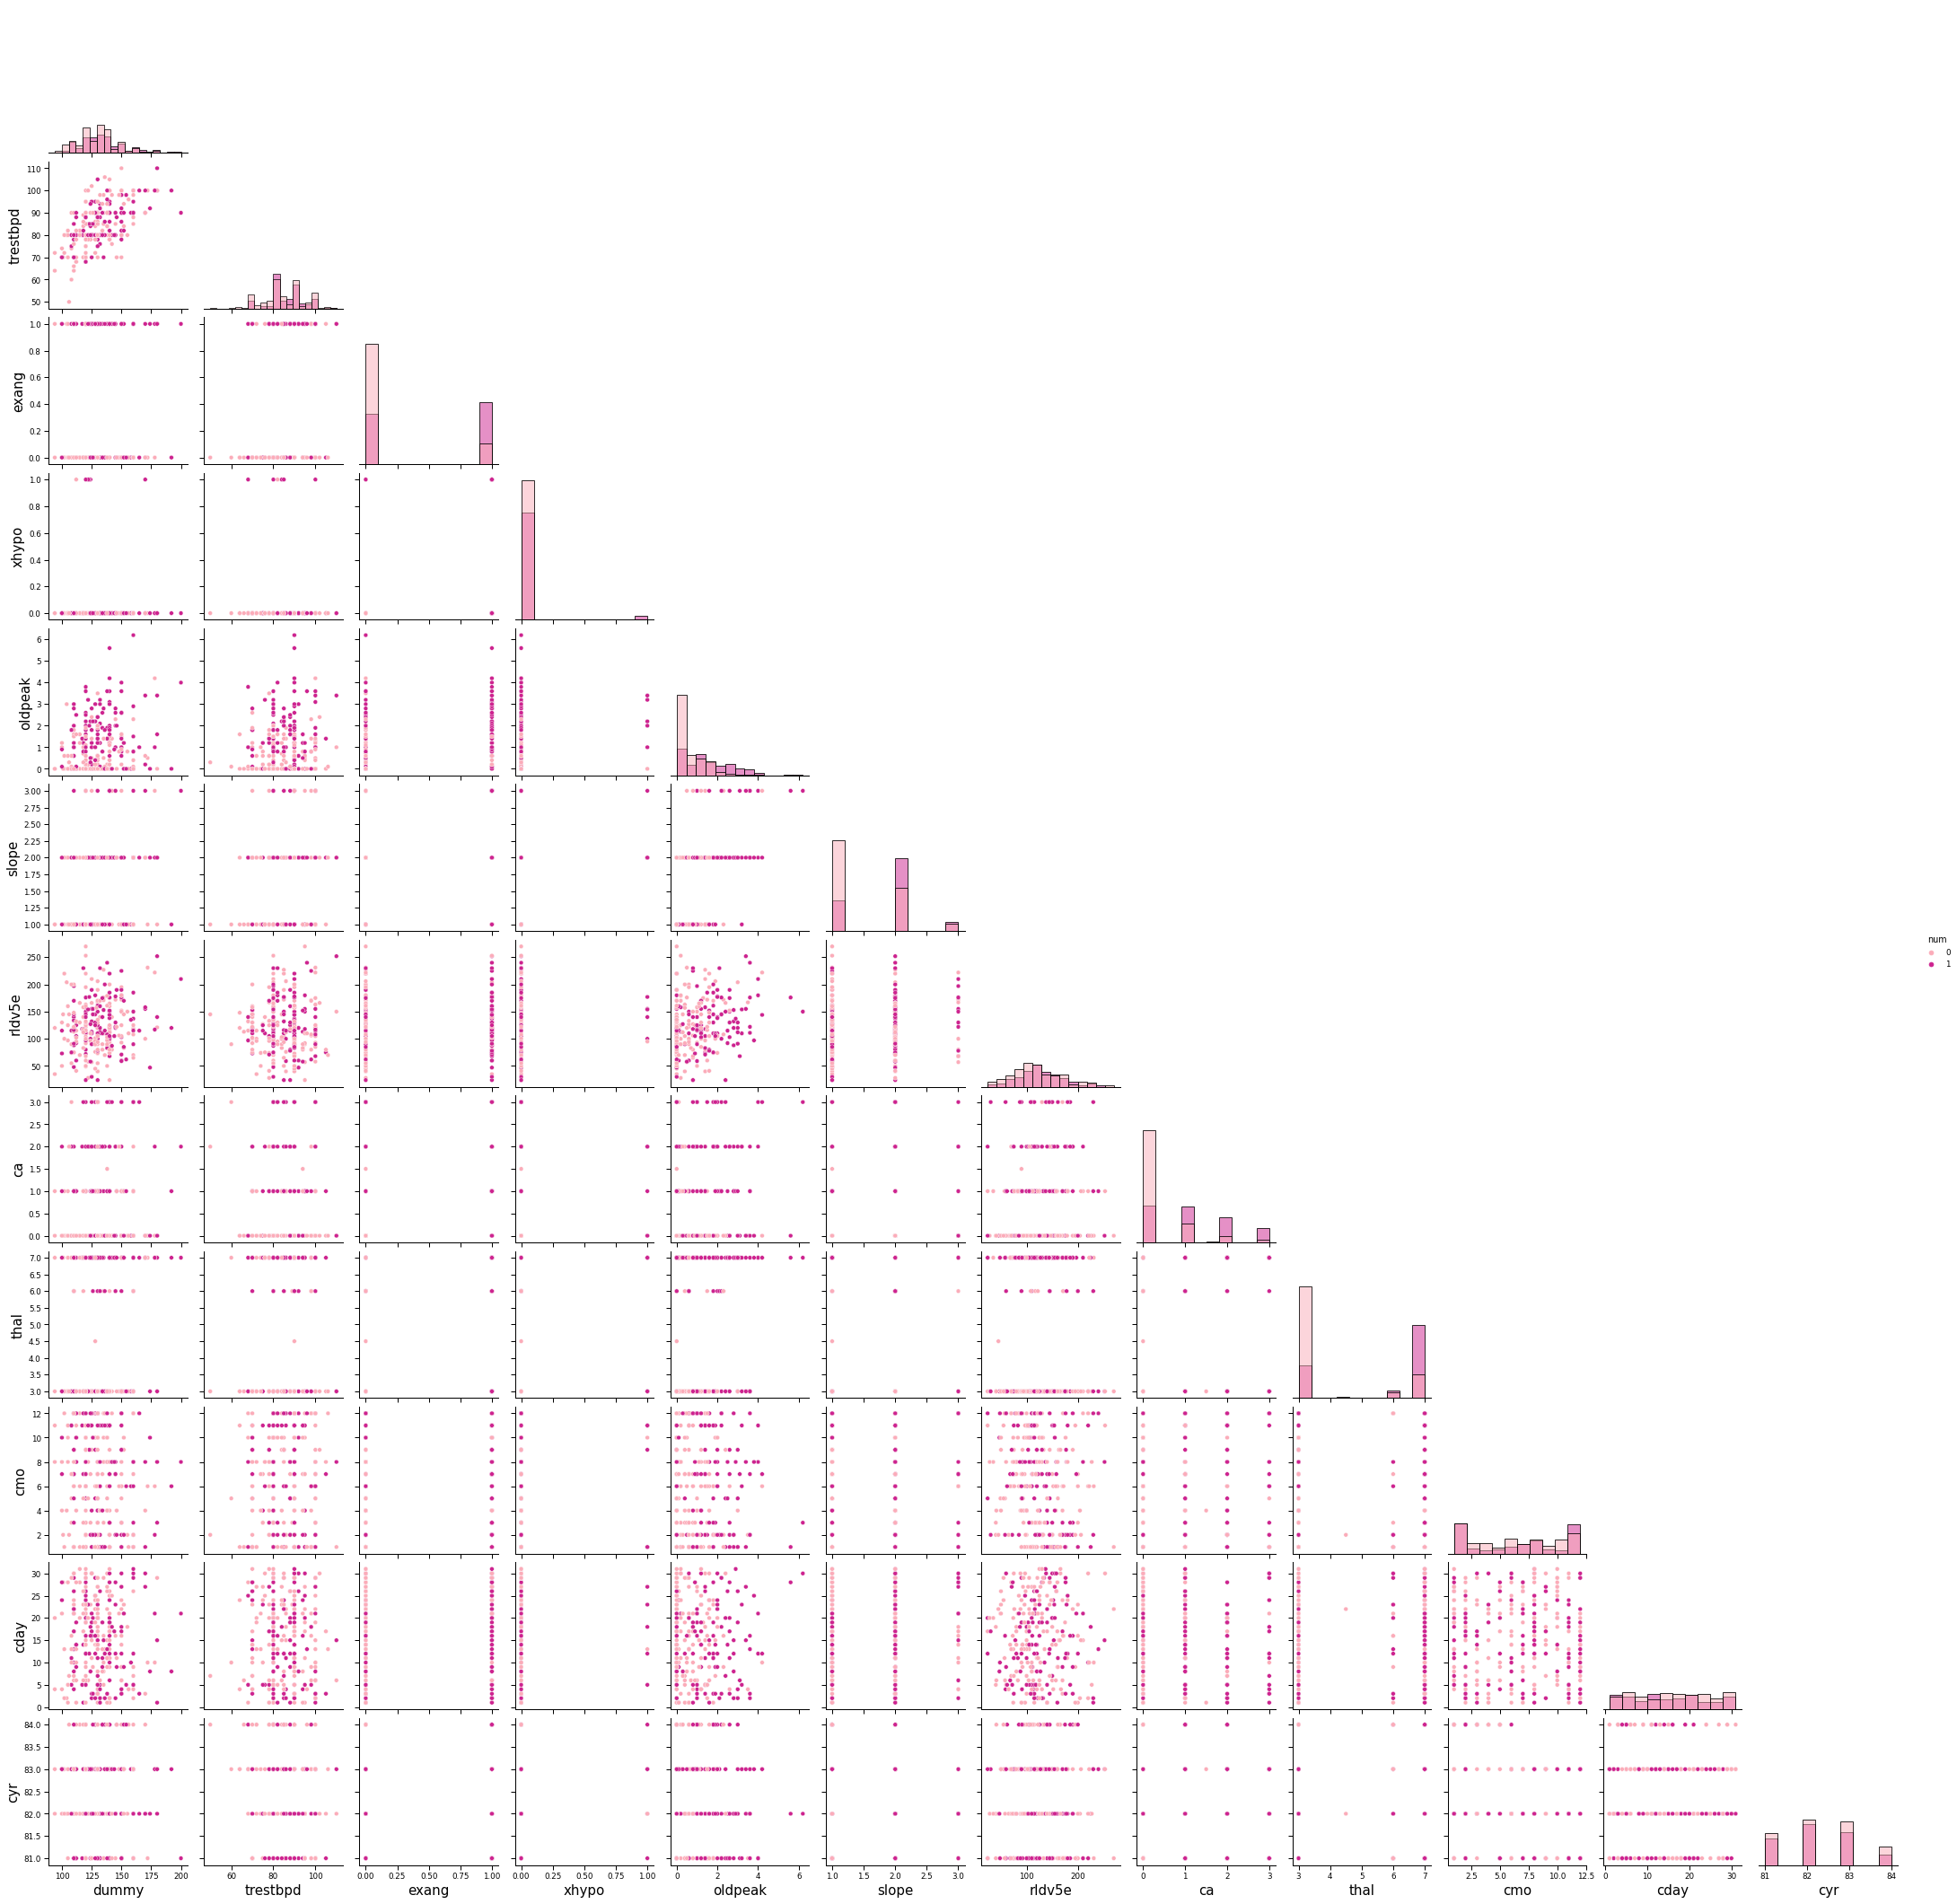

In [15]:
sns.set_context("paper", rc={"axes.labelsize":15})
sns.pairplot(cleveland_data.loc[:, 'dummy':'num'], palette="RdPu", hue='num', diag_kind="hist", corner=True)

<a id='Pre'></a>
## <span style="color:darkslateblue">3. Pre-processing of the Data Set</span>

### <span style="color:slateblue"> 3.1 Missing Values</span>

[done by Francesco on a separate python file. Data already corrected when imported into this notebook]

### <span style="color:slateblue"> 3.2 Outliers</span>


### <span style="color:slateblue"> 3.3 Class Balancing</span>
We will check if class balancing provides better performance results, since we could introduce bias in our analysis. By undersampling, since we do not have a big dataset, we would loos a huge quantity of data. Therefore, we will use a methdod for class balancing called **SMOTE**. It is an oversampling method that synthetically adds new samples for the minority class. 

As an example in 2D, for each observation that belongs to the under-represented class, the algorithm gets its K-nearest-neighbors and synthesizes a new instance of the minority label at a random location in the line between the current observation and its nearest neighbor. 


In [16]:
y = cleveland_data['num']
cleveland_data= cleveland_data.drop(columns='num')
X = cleveland_data.loc[:, 'age':]

In [17]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=2)
X_res, y_res = sm.fit_resample(X, y)

In [18]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, random_state = 2)

#Train, Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)
#Scale original data
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
#Scale balanced data
X_train_res= scaler.fit_transform(X_train_res)
X_test_res = scaler.fit_transform(X_test_res)

In [19]:
lr = LogisticRegression(random_state=2, solver='liblinear')
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=2)
nn = MLPClassifier(random_state=2)
rf = RandomForestClassifier(random_state=2)

models = [lr, kn, dt, nn, rf]
models_names=['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', "Neural Network Classifier", "Random Forest Classifier"]

train_accuracy = []
cv_accuracy=[]
test_accuracy=[]

data=[[X_train, X_test, y_train, y_test], [X_train_res, X_test_res, y_train_res, y_test_res]]

for dataset in data:
    
    train_accuracy_i=[]
    cv_accuracy_i=[]
    test_accuracy_i=[]
    
    for model in range(len(models)):
        model_ = clone(models[model])
        model_.fit(dataset[0], dataset[2])
        
        #--Train scores
        y_pred_train = model_.predict(dataset[0])
        train_accuracy_i.append(accuracy_score(dataset[2], y_pred_train))
        
        #--Validation scores
        cv_results = cross_validate(model_, dataset[0], dataset[2], scoring=["accuracy"] , return_train_score=True)
        cv_accuracy_i.append(abs(np.mean(cv_results['test_accuracy'])))
                           
        #--Test scores
        y_pred_test = model_.predict(dataset[1])
        test_accuracy_i.append(accuracy_score(dataset[3], y_pred_test))
    
    train_accuracy.append(train_accuracy_i)
    cv_accuracy.append(cv_accuracy_i)
    test_accuracy.append(test_accuracy_i)
    
original_df = pd.DataFrame(list(zip(train_accuracy[0], cv_accuracy[0], test_accuracy[0])), columns=["Train Accuracy", "Validation Accuracy", "Test Accuracy"])
original_df.index=models_names
                             
balanced_df = pd.DataFrame(list(zip(train_accuracy[1], cv_accuracy[1], test_accuracy[1])), columns=["Train Accuracy", "Validation Accuracy", "Test Accuracy"])
balanced_df.index=models_names

In [20]:
original_df.head()

,Train Accuracy,Validation Accuracy,Test Accuracy
Logistic Regression,1.000000,0.948062,0.971831
KNN Classifier,0.886256,0.810520,0.887324
Decision Tree Classifier,1.000000,0.929125,0.873239
Neural Network Classifier,1.000000,0.910078,0.971831
Random Forest Classifier,1.000000,0.957697,0.985915


In [21]:
balanced_df.head()

,Train Accuracy,Validation Accuracy,Test Accuracy
Logistic Regression,0.991489,0.910638,0.886076
KNN Classifier,0.914894,0.846809,0.822785
Decision Tree Classifier,1.000000,0.919149,0.835443
Neural Network Classifier,1.000000,0.902128,0.860759
Random Forest Classifier,1.000000,0.927660,0.835443


We will not use SMOTE for balancing, since the ratio is very small 54:46, and no improvement is sobserved in performance

<a id='Modelling'></a>
## <span style="color:darkslateblue">4. **Supervised or Unsupervised Learning**</span>


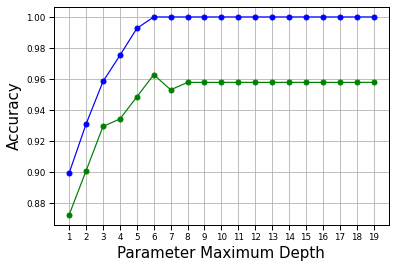

In [22]:
#Validation curve for Random Forest Classifier parameter "max_depth"
param_range = np.arange(1,20,1)
train_scores, test_scores = validation_curve(estimator= RandomForestClassifier(random_state=2), 
                                             X=X_train, y=y_train,
                                             cv=10, 
param_name='max_depth', param_range=param_range)

#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean, 
         marker='o', markersize=5, 
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean, 
         marker='o', markersize=5, 
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(param_range)
plt.grid()
plt.show()

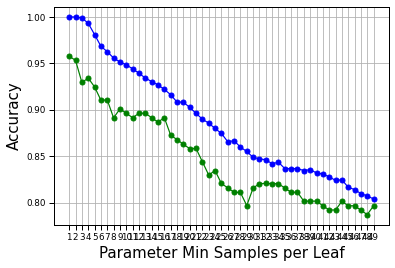

In [23]:
#Validation curve for Random Forest Classifier parameter "min_samples_leaf"
param_range = np.arange(1,50,1)
train_scores, test_scores = validation_curve(estimator= RandomForestClassifier(random_state=2), 
                                             X=X_train, y=y_train,
                                             cv=10, 
param_name='min_samples_leaf', param_range=param_range)

#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean, 
         marker='o', markersize=5, 
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean, 
         marker='o', markersize=5, 
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter Min Samples per Leaf')
plt.ylabel('Accuracy')
plt.xticks(param_range)
plt.grid()
plt.show()

In [24]:
def Grid_Search_cv(model, X, y):
    
    grid = GridSearchCV(model, params, verbose = 0, cv = 5, n_jobs = -1, return_train_score = True)

    grid_results = grid.fit(X, y)
    
    return grid_results.best_estimator_.get_params()

In [25]:
model= RandomForestClassifier(random_state=2)
params={'criterion':['gini', 'entropy'], 'max_depth':np.arange(1,4,1), "min_samples_leaf": np.arange(3,10,1)}
best_params_rf = Grid_Search_cv(model, X_train, y_train)
print('\033[1m' + 'Best parameter for ' + 'RF' +'\033[0m')
print(best_params_rf)

Best parameter for RF
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}


### Testing more models!

In [26]:
random_state=2

models_names=['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', "Neural Network Classifier", "Random Forest Classifier"]


clfs= [LogisticRegression(solver='liblinear', random_state=random_state), KNeighborsClassifier(),
       DecisionTreeClassifier(random_state=random_state),MLPClassifier(random_state=random_state), RandomForestClassifier(random_state=2)]

params={0: {'penalty':['l1', 'l2'], 'C': np.arange(0.01, 0.2, 0.01)}, 
       1: {'n_neighbors':np.arange(5, 10, 1), 'metric':['euclidean','manhattan'], 'weights': ['uniform', 'distance']},
       2: {'criterion':['gini', 'entropy'], 'max_depth':np.arange(2,4,1), 'min_samples_leaf': np.arange(10,20,1)}, 
       3: {'hidden_layer_sizes': [(22,), (22, 22)], 'solver':['sgd', 'adam'], 'activation':['logistic', 'tanh', 'relu']},
       4: {'criterion':['gini', 'entropy'], 'max_depth':np.arange(1,4,1), "min_samples_leaf": np.arange(3,10,1)}}

def Grid_Search_cv(model_index, X, y):
    
    grid = GridSearchCV(clfs[model_index], params[model_index], verbose = 0, cv = 5, n_jobs = -1, return_train_score = True)

    grid_results = grid.fit(X, y)
    
    return grid_results.best_estimator_.get_params()

best_params_lr = Grid_Search_cv(0, X_train, y_train)
best_params_kn = Grid_Search_cv(1, X_train, y_train)
best_params_dt = Grid_Search_cv(2, X_train, y_train)
best_params_nn = Grid_Search_cv(3, X_train, y_train)
best_params_rf = Grid_Search_cv(4, X_train, y_train)

best_params_=[best_params_lr, best_params_kn, best_params_dt, best_params_nn, best_params_rf]

for i in range(len(models_names)):
    print(" ")
    print('\033[1m' + 'Best parameter for ' + str(models_names[i]) +'\033[0m')
    print(best_params_[i])

 
Best parameter for Logistic Regression
{'C': 0.05, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 2, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
 
Best parameter for KNN Classifier
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
 
Best parameter for Decision Tree Classifier
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2, 'splitter': 'best'}
 
Best parameter for Neural Network Classifier
{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'e

In [27]:
train_accuracy=[]
train_recall=[]
train_precision=[]
train_f1=[]

cv_accuracy=[]
cv_precision=[]
cv_recall=[]
cv_f1=[]

test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

for ix in range(len(models_names)):
    
    original_model=clone(clfs[ix])
    
    optimized_model=clone(clfs[ix]).set_params(**best_params_[ix])
    
    models=[optimized_model, original_model]
    
    for model in models:
        
        model = clone(model)
        
        model.fit(X_train, y_train)
        
        #--Train scores
        y_pred_train = model.predict(X_train)
        train_accuracy.append(accuracy_score(y_train, y_pred_train))
        train_recall.append(recall_score(y_train, y_pred_train))
        train_precision.append(precision_score(y_train, y_pred_train))
        train_f1.append(f1_score(y_train, y_pred_train))
        
        #--Validation scores
        cv_results = cross_validate(model, X_train, y_train, scoring=["accuracy", "recall", "precision", "f1"])
        cv_accuracy.append(abs(np.mean(cv_results['test_accuracy'])))
        cv_recall.append(abs(np.mean(cv_results['test_recall'])))
        cv_precision.append(abs(np.mean(cv_results['test_precision'])))
        cv_f1.append(abs(np.mean(cv_results['test_f1'])))
        
        #--Test scores
        y_pred_test = model.predict(X_test)
        test_accuracy.append(accuracy_score(y_test, y_pred_test))
        test_recall.append(recall_score(y_test, y_pred_test))
        test_precision.append(precision_score(y_test, y_pred_test))
        test_f1.append(f1_score(y_test, y_pred_test))


        

In [28]:
index_names=['Logistic Regression Tuned', 'Logistic Regression', 'KNN Classifier Tuned', 'KNN Classifier', 
            'Decision Tree Classifier Tuned', 'Decision Tree Classifier', 'Neural Network Classifier Tuned', 'Neural Network Classifier',
            'Random Forest Classifier Tuned', 'Random Forest Classifier'
            ]

ht_results = pd.DataFrame(list(zip(train_accuracy, train_recall, train_precision, train_f1, cv_accuracy, cv_recall,
                                  cv_precision, cv_f1, test_accuracy, test_recall, test_precision, test_f1)), columns=["Train Accuracy",
                                                                                                       "Train Recall", "Train Precision", "Train F1", 
                                                                                                       "Validation Accuracy", "Validation Recall", 
                                                                                                       "Validation Precision","Validation F1", "Test Accuracy", 
                                                                                                       "Test Recall", "Test Precision", "Test F1"])
ht_results.index=index_names


In [29]:
ht_results

,Train Accuracy,Train Recall,Train Precision,Train F1,Validation Accuracy,Validation Recall,Validation Precision,Validation F1,Test Accuracy,Test Recall,Test Precision,Test F1
Logistic Regression Tuned,0.938389,0.867347,1.0,0.928962,0.933998,0.857895,1.000000,0.920813,0.943662,0.851852,1.000000,0.920000
Logistic Regression,1.000000,1.000000,1.0,1.000000,0.948062,0.898947,0.989474,0.940502,0.971831,0.925926,1.000000,0.961538
KNN Classifier Tuned,1.000000,1.000000,1.0,1.000000,0.829457,0.643684,0.984615,0.777273,0.887324,0.703704,1.000000,0.826087
KNN Classifier,0.886256,0.755102,1.0,0.860465,0.810520,0.602632,0.983333,0.745882,0.887324,0.703704,1.000000,0.826087
Decision Tree Classifier Tuned,0.928910,0.846939,1.0,0.917127,0.873200,0.816842,0.918182,0.862426,0.901408,0.740741,1.000000,0.851064
Decision Tree Classifier,1.000000,1.000000,1.0,1.000000,0.929125,0.908421,0.938847,0.921575,0.873239,0.814815,0.846154,0.830189
Neural Network Classifier Tuned,1.000000,1.000000,1.0,1.000000,0.929125,0.888947,0.957709,0.919712,0.957746,0.888889,1.000000,0.941176
Neural Network Classifier,1.000000,1.000000,1.0,1.000000,0.910078,0.858421,0.944376,0.898435,0.971831,0.925926,1.000000,0.961538
Random Forest Classifier Tuned,0.957346,0.908163,1.0,0.951872,0.929236,0.847895,1.000000,0.915415,0.957746,0.888889,1.000000,0.941176
Random Forest Classifier,1.000000,1.000000,1.0,1.000000,0.957697,0.939474,0.967709,0.952190,0.985915,0.962963,1.000000,0.981132


<a id='Feature'></a>
## <span style="color:darkslateblue">5. **Feature Selection and Extraction**</span>

In this section we will compare performance metrics applying three types of feature selection methods:
1. [**Filter Methods**: F1-Score](#F1)
2. [**Filter Methods**: Mutual Information](#MI)
3. [**Wrapper Methods**: Backward Selection](#BS)

<a id='F1'></a>
#### <span style="color:#DB8AC4">5.1.1 Filter Methods: F1-Score</span>





The number of features which provides the highest accuracy for Logistic Regression is: 8

The number of features which provides the highest F1 for Logistic Regression is: 8

The number of features which provides the highest accuracy for Neural Networks is: 8

The number of features which provides the highest F1 for Neural Networks is: 8


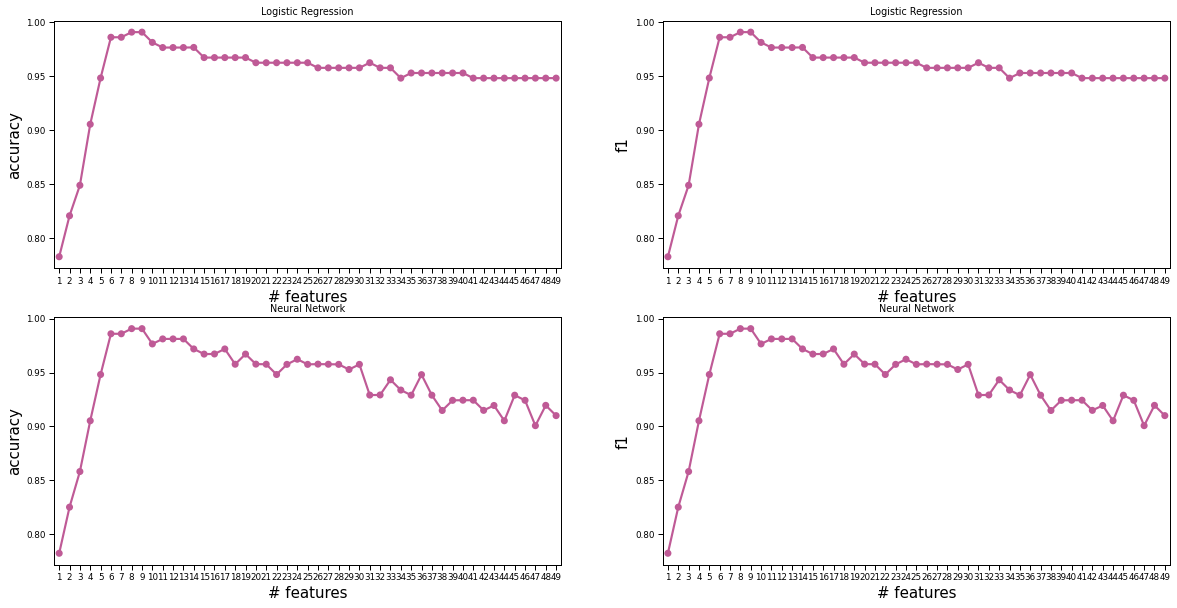

In [40]:
cv_accuracy=[]
cv_f1=[]

for model in [0,3]:
    
    cv_accuracy_i=[]
    cv_f1_i=[]

    for k in np.arange(1,len(X.columns)+1):

        #Select K best features
        selector = SelectKBest(score_func=f_regression, k=k)
        #Fit selector with train data
        new_data = selector.fit(X_train, y_train)

        #Obtain most relevant column indices
        cols_index = selector.get_support(indices = True)
        cols = [i for i in X.columns[cols_index]]
        #F-test scores
        score = selector.scores_
        score /= np.max(score)

        lr_s = clone(clfs[model]).set_params()
        lr_s.fit(X_train[:, cols_index], y_train)

        #CV scores
        cv_results = cross_validate(lr_s, X_train[:, cols_index], y_train, scoring=["f1", "accuracy"])
        cv_accuracy_i.append(abs(np.mean(cv_results['test_accuracy'])))
        cv_f1_i.append(abs(np.mean(cv_results['test_f1'])))
    
    cv_accuracy.append(cv_accuracy_i)
    cv_f1.append(cv_accuracy_i)

fig,axes =plt.subplots(2,2, figsize=(20,10))

x = np.arange(1,X.shape[1]+1)
a1 = sns.pointplot(x=x, y=cv_accuracy[0], color='#BF5A96', ax=axes[0,0] )
a2 = sns.pointplot(x=x, y=cv_f1[0], color='#BF5A96', ax=axes[0,1])
a3 = sns.pointplot(x=x, y=cv_accuracy[1], color='#BF5A96', ax=axes[1,0])
a4 = sns.pointplot(x=x, y=cv_f1[1], color='#BF5A96', ax=axes[1,1])


a1.set(xlabel='# features', ylabel='accuracy', title="Logistic Regression")
a2.set(xlabel='# features', ylabel='f1', title="Logistic Regression")
a3.set(xlabel='# features', ylabel='accuracy', title="Neural Network")
a4.set(xlabel='# features', ylabel='f1', title="Neural Network")

plt.xticks()
#Print best result
print("\033[1m\nThe number of features which provides the highest accuracy for Logistic Regression is:\033[0m", cv_accuracy[0].index(max(cv_accuracy[0])) + 1)
print("\033[1m\nThe number of features which provides the highest F1 for Logistic Regression is:\033[0m", cv_f1[0].index(max(cv_f1[0])) + 1)

#Print best result
print("\033[1m\nThe number of features which provides the highest accuracy for Neural Networks is:\033[0m", cv_accuracy[1].index(max(cv_accuracy[1])) + 1)
print("\033[1m\nThe number of features which provides the highest F1 for Neural Networks is:\033[0m", cv_f1[1].index(max(cv_f1[1])) + 1)

In [42]:
#--Obtain transformed X_train, X_test

#Select K best features
selector = SelectKBest(score_func=f_regression, k=5)
#Fit selector with train data
new_data = selector.fit(X_train, y_train)

#Obtain most relevant column indices
cols_index = selector.get_support(indices = True)
cols = [i for i in X.columns[cols_index]]
non_relevant = [i for i in X.columns if i not in cols]

#F-test scores
score = selector.scores_
score /= np.max(score)

#Ranking
ranking_fs=np.argsort(-score)
ranking_fs=[i for i in X.columns[ranking_fs]]
ranking_fs= pd.DataFrame([ranking_fs], columns=np.arange(1,X.shape[1]+1), index=['ranking']).T

bag_names = []
for name in X.columns:
    if name not in cols:
        bag_names.append('No')
    else:
        bag_names.append('Yes')
        
f_regression_features = pd.DataFrame([bag_names], columns=X.columns, index=['selected'])

X_train_fs, X_test_fs = X_train[:, cols_index], X_test[:, cols_index]

In [43]:
f_regression_features

,age,sex,cp,trestbps,htn,chol,cigs,years,fbs,dm,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
selected,No,No,No,No,No,No,No,No,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,No


In [44]:
ranking_fs

,ranking
1,thal
2,laddist
3,rcaprox
4,om1
5,ladprox
6,cxmain
7,exang
8,rcadist
9,oldpeak
10,ca


In [45]:
train_accuracy=[]
train_recall=[]
train_precision=[]
train_f1=[]

cv_accuracy=[]
cv_precision=[]
cv_recall=[]
cv_f1=[]

test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

datasets=[[X_train_fs, X_test_fs], [X_train, X_test]]

for ix in range(len(models_names)):
    
    original_model=clone(clfs[ix])    
    
    for dataset in datasets:
        
        original_model.fit(dataset[0], y_train)
        
        #--Train scores
        y_pred_train = original_model.predict(dataset[0])
        train_accuracy.append(accuracy_score(y_train, y_pred_train))
        train_recall.append(recall_score(y_train, y_pred_train))
        train_precision.append(precision_score(y_train, y_pred_train))
        train_f1.append(f1_score(y_train, y_pred_train))
        
        #--Validation scores
        cv_results = cross_validate(original_model, dataset[0], y_train, scoring=["accuracy", "recall", "precision", "f1"] , return_train_score=True)
        cv_accuracy.append(abs(np.mean(cv_results['test_accuracy'])))
        cv_recall.append(abs(np.mean(cv_results['test_recall'])))
        cv_precision.append(abs(np.mean(cv_results['test_precision'])))
        cv_f1.append(abs(np.mean(cv_results['test_f1'])))
        
        #--Test scores
        y_pred_test = original_model.predict(dataset[1])
        test_accuracy.append(accuracy_score(y_test, y_pred_test))
        test_recall.append(recall_score(y_test, y_pred_test))
        test_precision.append(precision_score(y_test, y_pred_test))
        test_f1.append(f1_score(y_test, y_pred_test))


In [46]:
index_names=['Logistic Regression FS', 'Logistic Regression', 'KNN Classifier FS', 'KNN Classifier', 
            'Decision Tree Classifier FS', 'Decision Tree Classifier', 'Neural Network Classifier FS', 'Neural Network Classifier',
             'Random Forest Classifier FS', 'Random Forest Classifier'
            ]

fs_results = pd.DataFrame(list(zip(train_accuracy, train_recall, train_precision, train_f1, cv_accuracy, cv_recall,
                                  cv_precision, cv_f1, test_accuracy, test_recall, test_precision, test_f1)), columns=["Train Accuracy",
                                                                                                       "Train Recall", "Train Precision", "Train F1", 
                                                                                                       "Validation Accuracy", "Validation Recall", 
                                                                                                       "Validation Precision","Validation F1", "Test Accuracy", 
                                                                                                       "Test Recall", "Test Precision", "Test F1"])
fs_results.index=index_names

fs_results

,Train Accuracy,Train Recall,Train Precision,Train F1,Validation Accuracy,Validation Recall,Validation Precision,Validation F1,Test Accuracy,Test Recall,Test Precision,Test F1
Logistic Regression FS,0.947867,0.887755,1.0,0.940541,0.948173,0.887895,1.000000,0.938354,0.985915,0.962963,1.000000,0.981132
Logistic Regression,1.000000,1.000000,1.0,1.000000,0.948062,0.898947,0.989474,0.940502,0.971831,0.925926,1.000000,0.961538
KNN Classifier FS,0.947867,0.887755,1.0,0.940541,0.943522,0.887895,0.987500,0.933592,0.985915,0.962963,1.000000,0.981132
KNN Classifier,0.886256,0.755102,1.0,0.860465,0.810520,0.602632,0.983333,0.745882,0.887324,0.703704,1.000000,0.826087
Decision Tree Classifier FS,0.947867,0.887755,1.0,0.940541,0.943411,0.877368,1.000000,0.931967,0.985915,0.962963,1.000000,0.981132
Decision Tree Classifier,1.000000,1.000000,1.0,1.000000,0.929125,0.908421,0.938847,0.921575,0.873239,0.814815,0.846154,0.830189
Neural Network Classifier FS,0.947867,0.887755,1.0,0.940541,0.948173,0.887895,1.000000,0.938354,0.985915,0.962963,1.000000,0.981132
Neural Network Classifier,1.000000,1.000000,1.0,1.000000,0.910078,0.858421,0.944376,0.898435,0.971831,0.925926,1.000000,0.961538
Random Forest Classifier FS,0.947867,0.887755,1.0,0.940541,0.948173,0.887895,1.000000,0.938354,0.985915,0.962963,1.000000,0.981132
Random Forest Classifier,1.000000,1.000000,1.0,1.000000,0.957697,0.939474,0.967709,0.952190,0.985915,0.962963,1.000000,0.981132



<a id='MI'></a>
#### <span style="color:#DB8AC4">5.1.2 Filter Methods: Mutual Information</span>



The number of features which provides the highest accuracy for Logistic Regression is: 12

The number of features which provides the highest F1 for Logistic Regression is: 12

The number of features which provides the highest accuracy for Neural Networks is: 11

The number of features which provides the highest F1 for Neural Networks is: 11


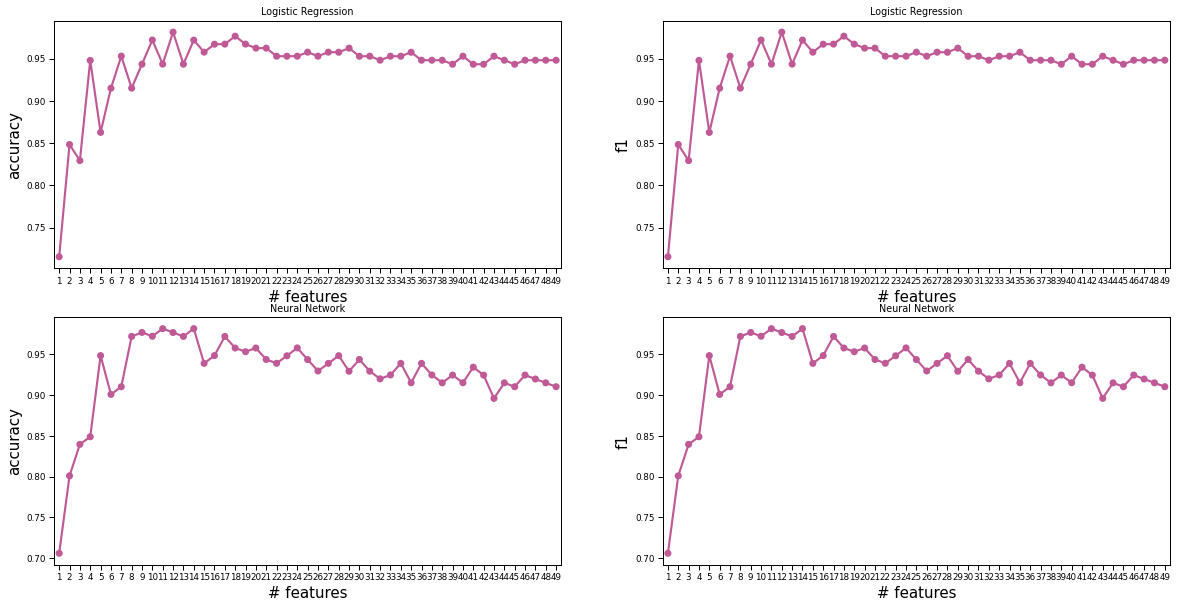

In [47]:
cv_accuracy=[]
cv_f1=[]

for model in [0,3]:
    
    cv_accuracy_i=[]
    cv_f1_i=[]

    for k in np.arange(1,len(X.columns)+1):

        #Select K best features
        selector = SelectKBest(score_func=mutual_info_regression, k=k)
        #Fit selector with train data
        new_data = selector.fit(X_train, y_train)

        #Obtain 10 most relevant column indices
        cols_index = selector.get_support(indices = True)
        cols = [i for i in X.columns[cols_index]]
        #F-test scores
        score = selector.scores_
        score /= np.max(score)

        lr_s = clone(clfs[model])
        lr_s.fit(X_train[:, cols_index], y_train)

        #CV scores
        cv_results = cross_validate(lr_s, X_train[:, cols_index], y_train, scoring=["f1", "accuracy"])
        cv_accuracy_i.append(abs(np.mean(cv_results['test_accuracy'])))
        cv_f1_i.append(abs(np.mean(cv_results['test_f1'])))
    
    cv_accuracy.append(cv_accuracy_i)
    cv_f1.append(cv_accuracy_i)

fig,axes =plt.subplots(2,2, figsize=(20,10))

a1 = sns.pointplot(x=x, y=cv_accuracy[0], color='#BF5A96', ax=axes[0,0] )
a2 = sns.pointplot(x=x, y=cv_f1[0], color='#BF5A96', ax=axes[0,1])
a3 = sns.pointplot(x=x, y=cv_accuracy[1], color='#BF5A96', ax=axes[1,0])
a4 = sns.pointplot(x=x, y=cv_f1[1], color='#BF5A96', ax=axes[1,1])


a1.set(xlabel='# features', ylabel='accuracy', title="Logistic Regression")
a2.set(xlabel='# features', ylabel='f1', title="Logistic Regression")
a3.set(xlabel='# features', ylabel='accuracy', title="Neural Network")
a4.set(xlabel='# features', ylabel='f1', title="Neural Network")

plt.xticks()
#Print best result
print("\033[1m\nThe number of features which provides the highest accuracy for Logistic Regression is:\033[0m", cv_accuracy[0].index(max(cv_accuracy[0])) + 1)
print("\033[1m\nThe number of features which provides the highest F1 for Logistic Regression is:\033[0m", cv_f1[0].index(max(cv_f1[0])) + 1)

#Print best result
print("\033[1m\nThe number of features which provides the highest accuracy for Neural Networks is:\033[0m", cv_accuracy[1].index(max(cv_accuracy[1])) + 1)
print("\033[1m\nThe number of features which provides the highest F1 for Neural Networks is:\033[0m", cv_f1[1].index(max(cv_f1[1])) + 1)

In [52]:
#--Obtain transformed X_train, X_test

#Select K best features
selector = SelectKBest(score_func=mutual_info_regression, k=5)
#Fit selector with train data
new_data = selector.fit(X_train, y_train)

#Obtain 10 most relevant column indices
cols_index = selector.get_support(indices = True)
cols = [i for i in X.columns[cols_index]]
non_relevant = [i for i in X.columns if i not in cols]

#F-test scores
score = selector.scores_
score /= np.max(score)

#Ranking
ranking_mi=np.argsort(-score)
ranking_mi=[i for i in X.columns[ranking_mi]]
ranking_mi= pd.DataFrame([ranking_mi], columns=np.arange(1,X.shape[1]+1), index=['ranking']).T

bag_names = []
for name in X.columns:
    if name not in cols:
        bag_names.append('No')
    else:
        bag_names.append('Yes')
        
mutual_info_features = pd.DataFrame([bag_names], columns=X.columns, index=['selected'])

X_train_mi, X_test_mi = X_train[:, cols_index], X_test[:, cols_index]

In [53]:
mutual_info_features

,age,sex,cp,trestbps,htn,chol,cigs,years,fbs,dm,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
selected,No,No,No,No,No,No,No,No,No,No,...,No,Yes,Yes,No,Yes,Yes,No,No,Yes,No


In [54]:
ranking_mi

,ranking
1,ladprox
2,rcaprox
3,laddist
4,lvx4
5,om1
6,cxmain
7,oldpeak
8,slope
9,thal
10,thaltime


In [55]:
train_accuracy=[]
train_recall=[]
train_precision=[]
train_f1=[]

cv_accuracy=[]
cv_precision=[]
cv_recall=[]
cv_f1=[]

test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

datasets=[[X_train_mi, X_test_mi], [X_train, X_test]]

for ix in range(len(models_names)):
    
    original_model=clone(clfs[ix])
        
    
    for dataset in datasets:
        
        original_model.fit(dataset[0], y_train)
        
        #--Train scores
        y_pred_train = original_model.predict(dataset[0])
        train_accuracy.append(accuracy_score(y_train, y_pred_train))
        train_recall.append(recall_score(y_train, y_pred_train))
        train_precision.append(precision_score(y_train, y_pred_train))
        train_f1.append(f1_score(y_train, y_pred_train))
        
        #--Validation scores
        cv_results = cross_validate(original_model, dataset[0], y_train, scoring=["accuracy", "recall", "precision", "f1"] , return_train_score=True)
        cv_accuracy.append(abs(np.mean(cv_results['test_accuracy'])))
        cv_recall.append(abs(np.mean(cv_results['test_recall'])))
        cv_precision.append(abs(np.mean(cv_results['test_precision'])))
        cv_f1.append(abs(np.mean(cv_results['test_f1'])))
        
        #--Test scores
        y_pred_test = original_model.predict(dataset[1])
        test_accuracy.append(accuracy_score(y_test, y_pred_test))
        test_recall.append(recall_score(y_test, y_pred_test))
        test_precision.append(precision_score(y_test, y_pred_test))
        test_f1.append(f1_score(y_test, y_pred_test))



In [56]:
index_names=['Logistic Regression MI', 'Logistic Regression', 'KNN Classifier MI', 'KNN Classifier', 
            'Decision Tree Classifier MI', 'Decision Tree Classifier', 'Neural Network Classifier MI', 'Neural Network Classifier',
             'Random Forest Classifier MI', 'Random Forest Classifier'
            ]

mi_results = pd.DataFrame(list(zip(train_accuracy, train_recall, train_precision, train_f1, cv_accuracy, cv_recall,
                                  cv_precision, cv_f1, test_accuracy, test_recall, test_precision, test_f1)), columns=["Train Accuracy",
                                                                                                       "Train Recall", "Train Precision", "Train F1", 
                                                                                                       "Validation Accuracy", "Validation Recall", 
                                                                                                       "Validation Precision","Validation F1", "Test Accuracy", 
                                                                                                       "Test Recall", "Test Precision", "Test F1"])
mi_results.index=index_names

mi_results

,Train Accuracy,Train Recall,Train Precision,Train F1,Validation Accuracy,Validation Recall,Validation Precision,Validation F1,Test Accuracy,Test Recall,Test Precision,Test F1
Logistic Regression MI,0.966825,0.928571,1.0,0.962963,0.966888,0.928421,1.000000,0.962431,0.943662,0.851852,1.000000,0.920000
Logistic Regression,1.000000,1.000000,1.0,1.000000,0.948062,0.898947,0.989474,0.940502,0.971831,0.925926,1.000000,0.961538
KNN Classifier MI,0.966825,0.928571,1.0,0.962963,0.966888,0.928421,1.000000,0.962431,0.943662,0.888889,0.960000,0.923077
KNN Classifier,0.886256,0.755102,1.0,0.860465,0.810520,0.602632,0.983333,0.745882,0.887324,0.703704,1.000000,0.826087
Decision Tree Classifier MI,0.966825,0.928571,1.0,0.962963,0.966888,0.928421,1.000000,0.962431,0.943662,0.851852,1.000000,0.920000
Decision Tree Classifier,1.000000,1.000000,1.0,1.000000,0.929125,0.908421,0.938847,0.921575,0.873239,0.814815,0.846154,0.830189
Neural Network Classifier MI,0.966825,0.928571,1.0,0.962963,0.966888,0.928421,1.000000,0.962431,0.943662,0.888889,0.960000,0.923077
Neural Network Classifier,1.000000,1.000000,1.0,1.000000,0.910078,0.858421,0.944376,0.898435,0.971831,0.925926,1.000000,0.961538
Random Forest Classifier MI,0.966825,0.928571,1.0,0.962963,0.966888,0.928421,1.000000,0.962431,0.943662,0.888889,0.960000,0.923077
Random Forest Classifier,1.000000,1.000000,1.0,1.000000,0.957697,0.939474,0.967709,0.952190,0.985915,0.962963,1.000000,0.981132


<a id='BS'></a>
#### <span style="color:#DB8AC4">5.1.3 Wrapper Methods: Backward Selection</span>
